In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

# Step1: Reading and Understanding the data

In [2]:
housing = pd.read_csv("Housing.csv")

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


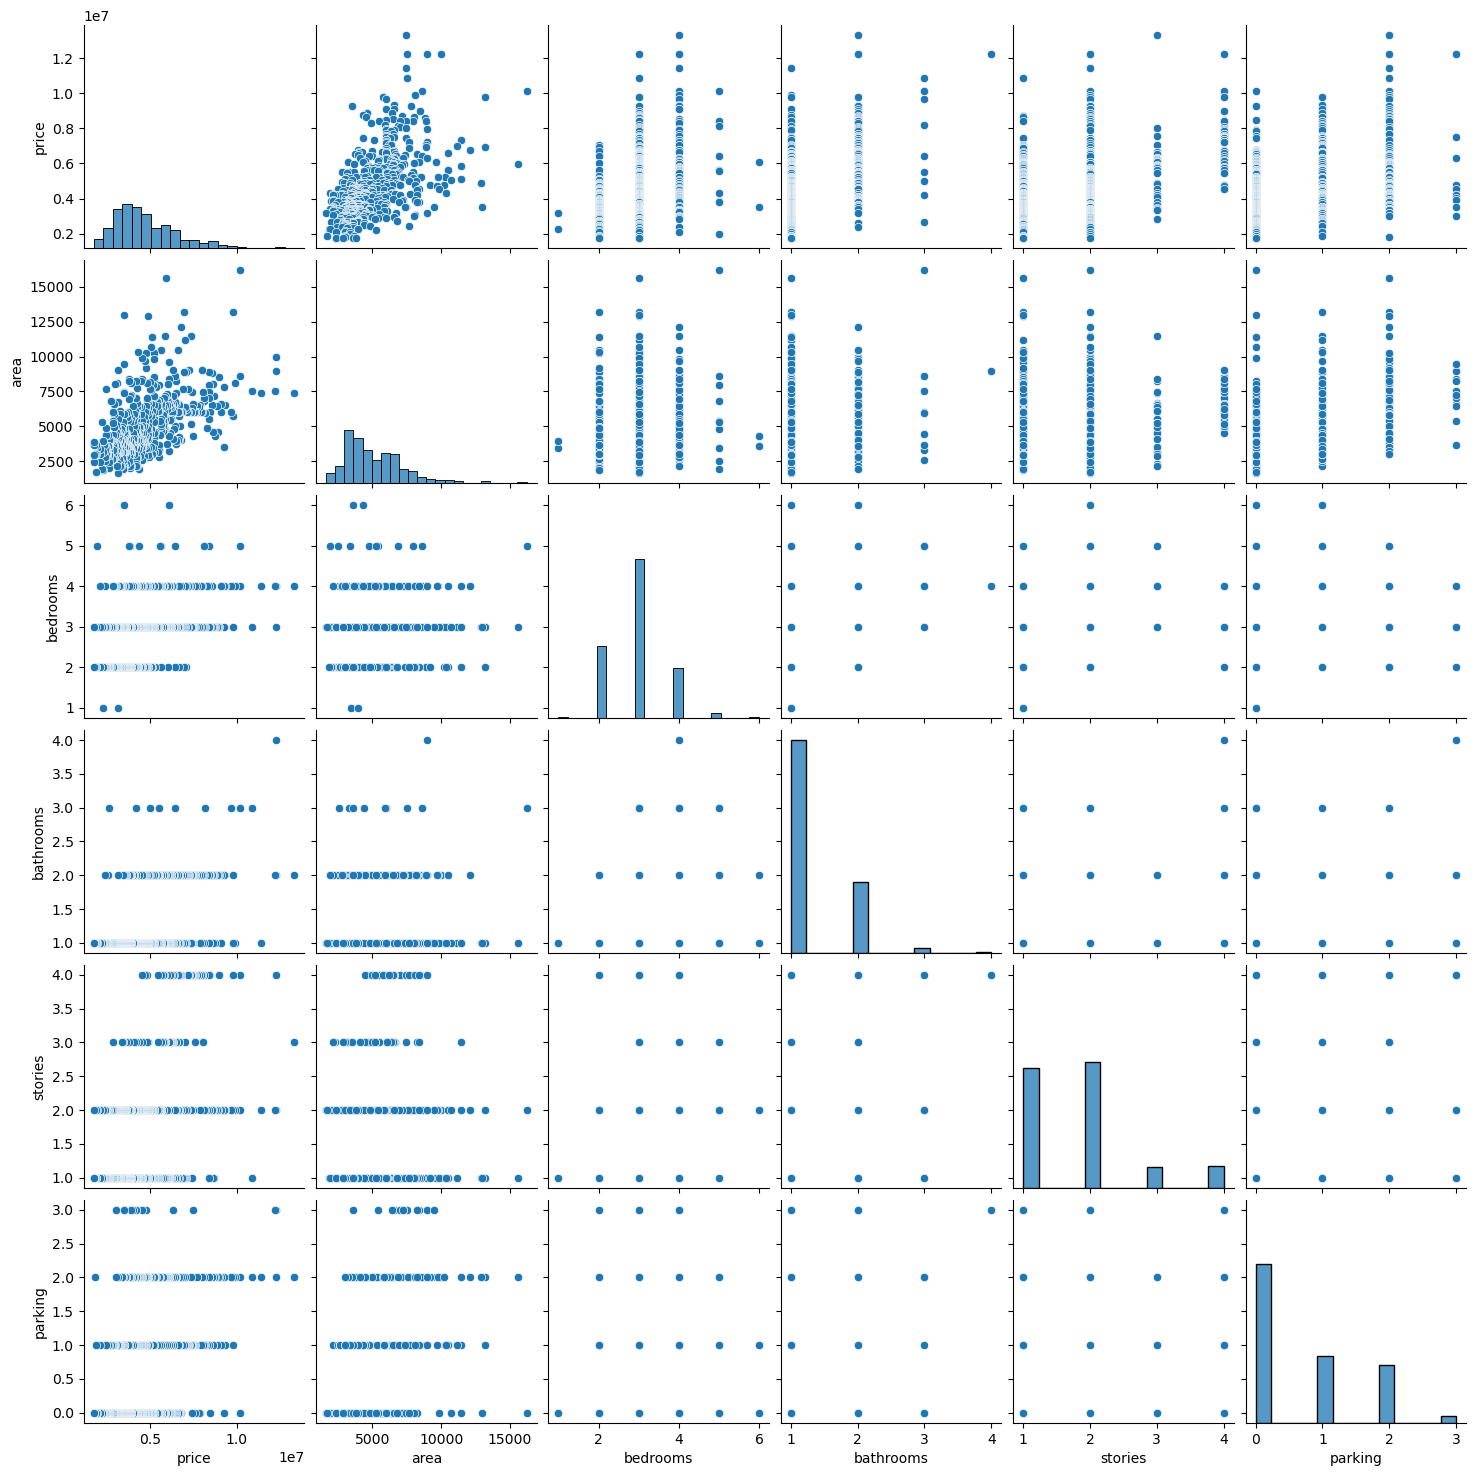

In [6]:
#visualization of numerical data
sns.pairplot(housing)

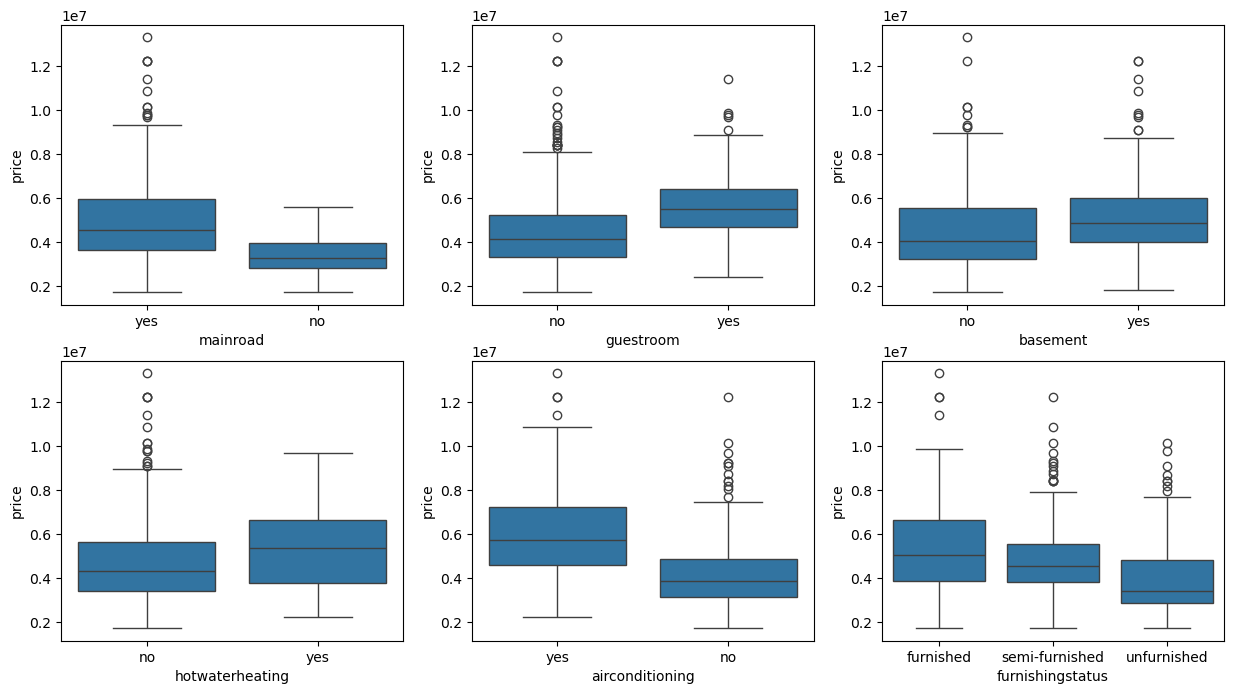

In [7]:
#visualizing the categorical data
plt.figure(figsize= (15,8))
plt.subplot(2, 3, 1)
sns.boxplot(x= "mainroad", y="price", data= housing)
plt.subplot(2, 3, 2)
sns.boxplot(x= "guestroom", y="price", data= housing)
plt.subplot(2, 3, 3)
sns.boxplot(x= "basement", y="price", data= housing)
plt.subplot(2, 3, 4)
sns.boxplot(x= "hotwaterheating", y="price", data= housing)
plt.subplot(2, 3, 5)
sns.boxplot(x= "airconditioning", y="price", data= housing)
plt.subplot(2, 3, 6)
sns.boxplot(x= "furnishingstatus", y="price", data= housing);

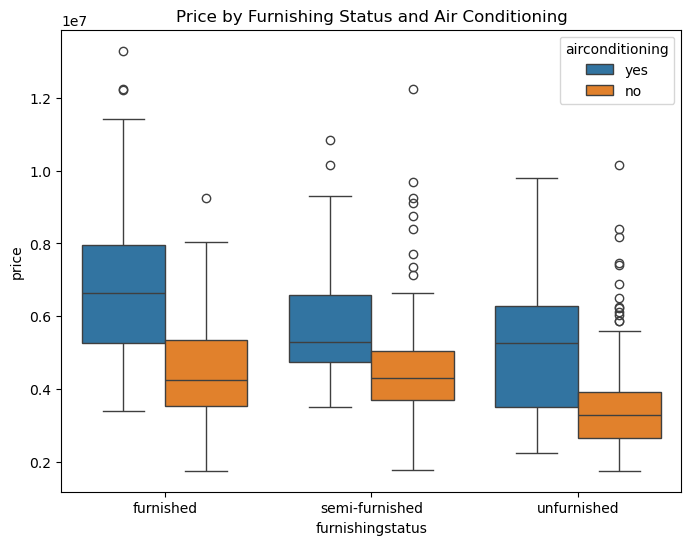

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="furnishingstatus", y="price", hue="airconditioning", data=housing)
plt.title("Price by Furnishing Status and Air Conditioning")
plt.show()

# Step2: Prepairing the data 

In [10]:
#1.encoding of the binary categorical data to 1/0
binary_categorical_varlist = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

In [11]:
housing.value_counts()

price     area   bedrooms  bathrooms  stories  mainroad  guestroom  basement  hotwaterheating  airconditioning  parking  prefarea  furnishingstatus
1750000   2910   3         1          1        no        no         no        no               no               0        no        furnished           1
5229000   7085   3         1          1        yes       yes        yes       no               no               2        yes       semi-furnished      1
5110000   11410  2         1          2        yes       no         no        no               no               0        yes       furnished           1
5145000   3410   3         1          2        no        no         no        no               yes              0        no        semi-furnished      1
          7980   3         1          1        yes       no         no        no               no               1        yes       semi-furnished      1
                                                                                       

In [12]:
housing[binary_categorical_varlist] = housing[binary_categorical_varlist].apply(lambda x: x.map({"yes":1, "no":0}))

In [13]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [14]:
#2. encoding dummy variables for other categorical values
status = pd.get_dummies(housing["furnishingstatus"])

In [15]:
#now we can drop one column so if we drop furnished column 00 wil be furnished 01 unfurnished and 10 for semi furnished

In [16]:
# dropping redundant dummy variable
status = pd.get_dummies(housing["furnishingstatus"], drop_first= True).astype(int)

In [17]:
housing = pd.concat([housing, status], axis = 1)

In [18]:
#drop old furnishingstatus column
housing.drop(columns="furnishingstatus", inplace = True)

In [19]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [20]:
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


### Split into train and test df

In [22]:
df_train, df_test = train_test_split(housing, train_size=0.7, random_state=100)

In [23]:
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


### Rescaling the variables
Rescaling is very necessary as we can see except area every other variable has very low value so we need to scale area otherwise co-eff of some might be very large as compared to other, results in difficulty to interpret the variables, we can do it by:
1. Min-Max scaling (normalisation): between 0 and 1 = (x - xmin)/(xmax - xmin)
2. Standardisation(mean = 0 and sigma =1)= (x - mean)/(sigma)

In [25]:
# using Min-Max scaling (normalisation): between 0 and 1
#1. instantiate an object
scaler = MinMaxScaler()
numerical_var = ["area", "bedrooms", "bathrooms", "stories", "parking", "price"]
df_train[numerical_var] = scaler.fit_transform(df_train[numerical_var])

### 🔧 Data Preprocessing Methods: `fit()`, `transform()`, and `fit_transform()`

##### 📌 `fit()`
- Computes the required statistics (e.g., mean and std for normalization).
- **Only use on the training set.**
- Example: `scaler.fit(X_train)`
- ⚠️ Never fit on test data — this causes data leakage.

##### 📌 `transform()`
- Applies the transformation using parameters computed by `fit()`.
- Use it on both train and test (after fitting on train).
- Example:  
  - `X_train_scaled = scaler.transform(X_train)`  
  - `X_test_scaled = scaler.transform(X_test)`

##### 📌 `fit_transform()`
- Combines both `fit()` and `transform()` in one step.
- Only use on **training data**.
- Example: `X_train_scaled = scaler.fit_transform(X_train)`


In [27]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [28]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step3: Train the model

In [30]:
# question one arises is which features to select

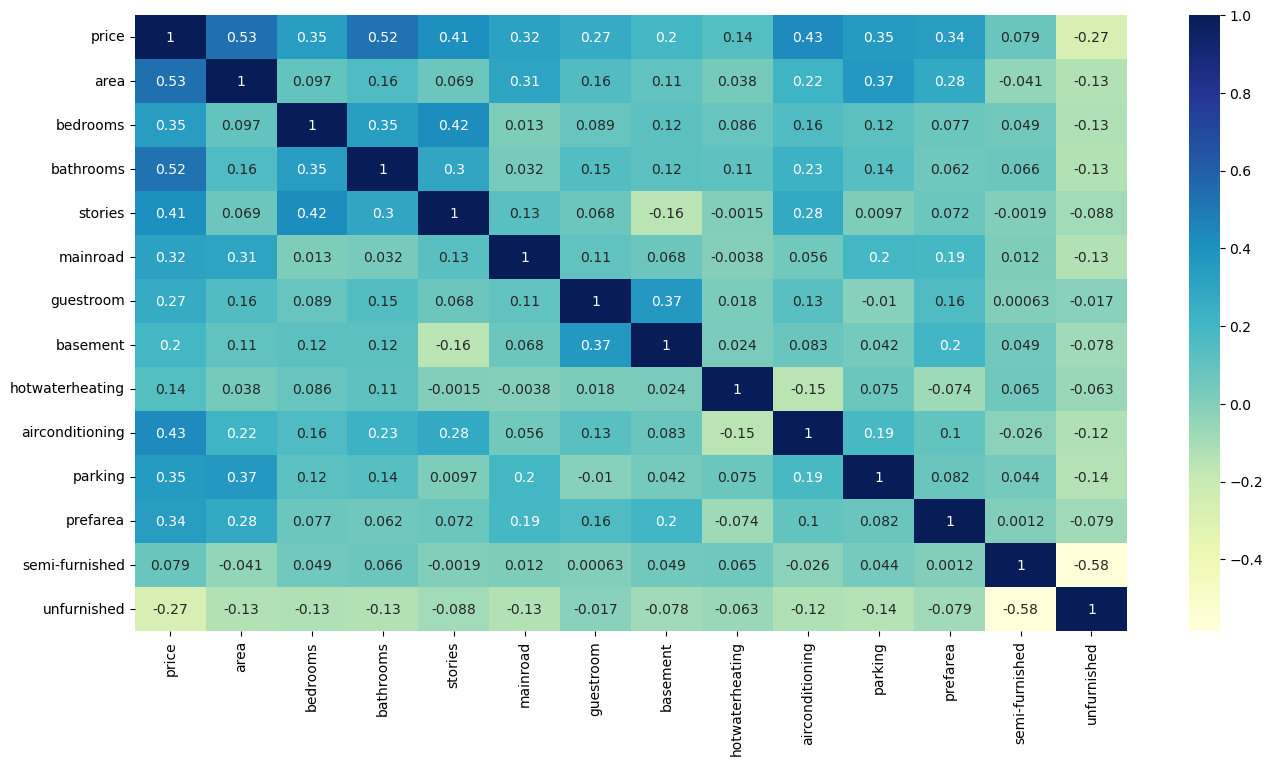

In [31]:
plt.figure(figsize = (16, 8))
sns.heatmap(df_train.corr(), annot= True, cmap = "YlGnBu");

In [32]:
# we will start with area and keep adding
y_train = df_train.pop("price")
X_train = df_train

In [33]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [34]:
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

we will see two thing :
- significance of the variables
- multicollinearity using VIF

In [36]:
#add constant
X_train_sm = sm.add_constant(X_train["area"])

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [37]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           3.15e-29
Time:                        09:45:34   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# add another variable
X_train_sm = sm.add_constant(X_train[["area", "bathrooms"]])

In [39]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [40]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           2.51e-54
Time:                        09:45:34   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
X_train_sm = sm.add_constant(X_train[["area", "bathrooms", "bedrooms"]])

In [42]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64

In [43]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           3.12e-57
Time:                        09:45:34   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [45]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           8.83e-83
Time:                        09:45:34   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [47]:
# dropping taking the significance with p-value
X_train_sm = sm.add_constant(X_train[['area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'unfurnished']])

In [48]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const              0.035722
area               0.234746
bathrooms          0.196480
stories            0.117751
mainroad           0.048798
guestroom          0.030097
basement           0.023917
hotwaterheating    0.086403
airconditioning    0.066533
parking            0.062872
prefarea           0.059643
unfurnished       -0.032317
dtype: float64

In [49]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           2.73e-84
Time:                        09:45:35   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We see that after removing the two vaiable with high p value we donot have much affect on the Rsq value

### Now lets check VIF

$$
\text{VIF}_i = \frac{1}{1 - R_i^2}
$$



In [52]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif["VIF"]= round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)

In [53]:
vif

,features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


### 🔍 Multicollinearity & Significance Decision Rules

We analyze each feature using both **p-value** (statistical significance) and **VIF** (multicollinearity):

- **High p-value**, **High VIF**  
  👉 Remove it — Not significant **and** highly collinear.

- **High p-value**, **Low VIF**  
  👉 Remove it first and re-evaluate the model — Not significant, but not collinear.

- **Low p-value**, **High VIF**  
  👉 Keep it **only if** most other variables are also significant.  
  If all variables have low p-values, remove those with **VIF > threshold** (e.g., VIF > 5 or 10).

- **Low p-value**, **Low VIF**  
  ✅ Keep it — Significant and not collinear.


In [55]:
X = X_train.drop("semi-furnished", axis = 1)

In [56]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const              0.020740
area               0.234404
bedrooms           0.046710
bathrooms          0.190876
stories            0.108475
mainroad           0.050401
guestroom          0.030447
basement           0.021605
hotwaterheating    0.084890
airconditioning    0.066803
parking            0.060761
prefarea           0.059419
unfurnished       -0.031594
dtype: float64

In [57]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           1.07e-83
Time:                        09:45:35   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by = "VIF", ascending=False)

In [59]:
vif

,features,VIF
1,bedrooms,6.587321
4,mainroad,5.675433
0,area,4.670442
3,stories,2.689344
9,parking,2.122636
6,basement,2.011951
8,airconditioning,1.766562
2,bathrooms,1.666284
10,prefarea,1.505338
5,guestroom,1.469081


In [60]:
X= X.drop("bedrooms", axis = 1)

In [61]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           2.73e-84
Time:                        09:45:35   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by= "VIF", ascending= False)

In [63]:
vif

,features,VIF
3,mainroad,4.791862
0,area,4.546377
2,stories,2.225831
8,parking,2.103005
5,basement,1.871437
7,airconditioning,1.764774
1,bathrooms,1.608652
9,prefarea,1.504142
4,guestroom,1.463201
10,unfurnished,1.332090


### We can see that none of the p-value > 0.05 and none of the VIF > 5

# Step4: Residual Analysis and evaluating on the test set

### Residual Analysis

In [66]:
y_train_pred = lr_model.predict(X_train_sm)

In [67]:
residuals = y_train - y_train_pred

<Axes: ylabel='Density'>

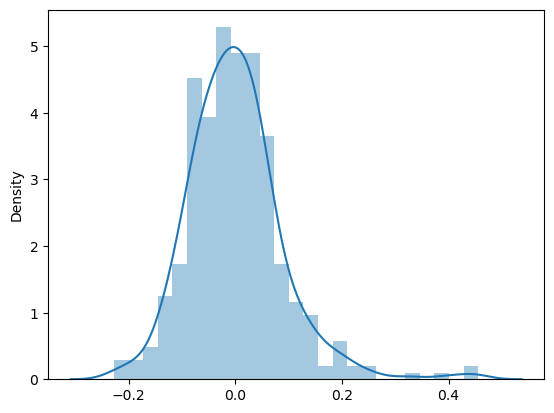

In [68]:
sns.distplot(residuals)

### We can see that the residuals are normally distributed so it satisfy our assumptions

### Prediction and evaluation on test set

In [71]:
# Rescaling
df_test[numerical_var] = scaler.transform(df_test[numerical_var])

In [72]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [73]:
y_test = df_test.pop("price")
X_test = df_test

In [74]:
#add constant
X_test_sm = sm.add_constant(X_test)

In [75]:
#drop columns that we removed from train set
X_test_sm = X_test_sm.drop(columns=["bedrooms", "semi-furnished"])

In [76]:
#prediction on test set
y_test_pred = lr_model.predict(X_test_sm)

In [77]:
residual_test = y_test-y_test_pred

<Axes: ylabel='Density'>

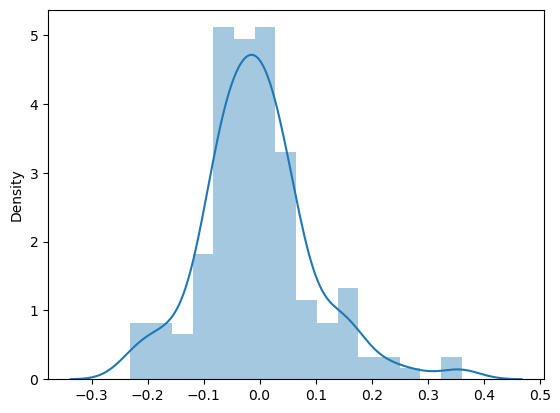

In [78]:
sns.distplot(residual_test)

In [79]:
#evaluate the R2
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.6800930630265902
0.6713505684480789


### We can say that what model learn on the training set was able to generalize on the test set

### 🏡 Linear Regression Formula (House Price Prediction)

The model predicts the house price using the following equation:

$$
\text{price} = 0.0357 + 0.2347 \cdot \text{area} + 0.1965 \cdot \text{bathrooms} + 0.1178 \cdot \text{stories} + 0.0488 \cdot \text{mainroad} \\
+ 0.0301 \cdot \text{guestroom} + 0.0239 \cdot \text{basement} + 0.0864 \cdot \text{hotwaterheating} + 0.0665 \cdot \text{airconditioning} \\
+ 0.0629 \cdot \text{parking} + 0.0596 \cdot \text{prefarea} - 0.0323 \cdot \text{unfurnished}
$$

Where:
- Each feature (e.g., `area`, `bathrooms`) is a variable input to the model.
- The coefficient shows the feature's contribution to the final predicted price.
- The `const` term is the **intercept**.
